# <b>Medical Insurance Cost Prediction</b>

### import dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
#TO ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Data Collection and Analysis

In [6]:
# loading the data from csv file to a pandas Dataframe
insurance_dataset = pd.read_csv('insurance.csv') # reading the data from the dataset


In [7]:
# showing data from the data set
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# number of rows and columns in data set
insurance_dataset.shape

(1338, 7)

In [9]:
# getting information of data set
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features :
- sex
- smoker
- region
- here ``charges`` is the Target variable

In [11]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- In the data set we don't have any missing values.

### Data Analysis

In [14]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

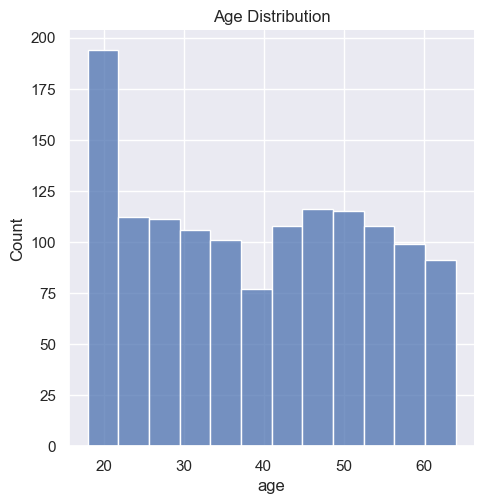

In [15]:
# Distribution of age value
sns.set()
plt.figure(figsize =(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

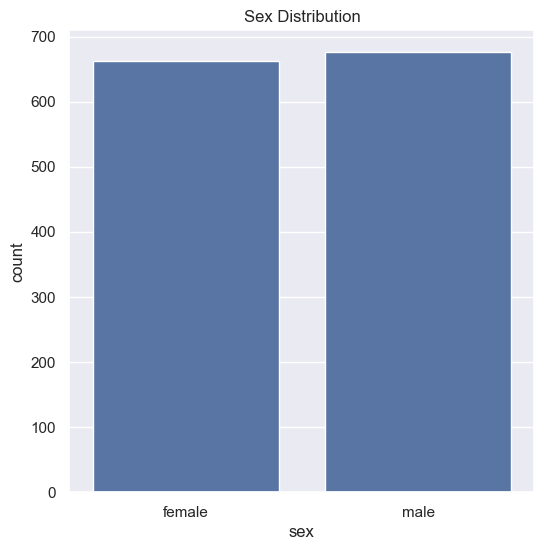

In [16]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [17]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

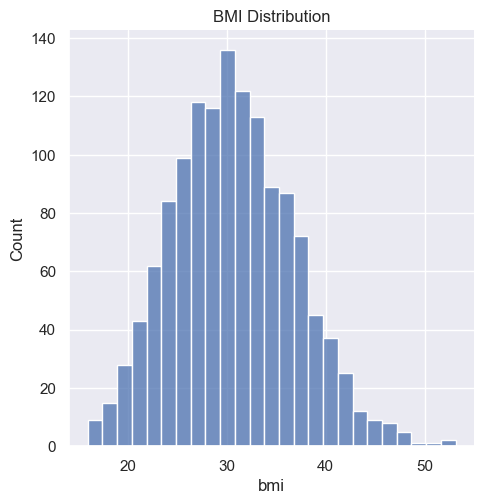

In [18]:
# bmi distribution
plt.figure(figsize =(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

- Normal BMI range for a person is 18.5 to 24.9 
- if > 18.5 = under weight
- if 18.5 tp 24.9 = Normal weight
- if < 24.9 = over weight

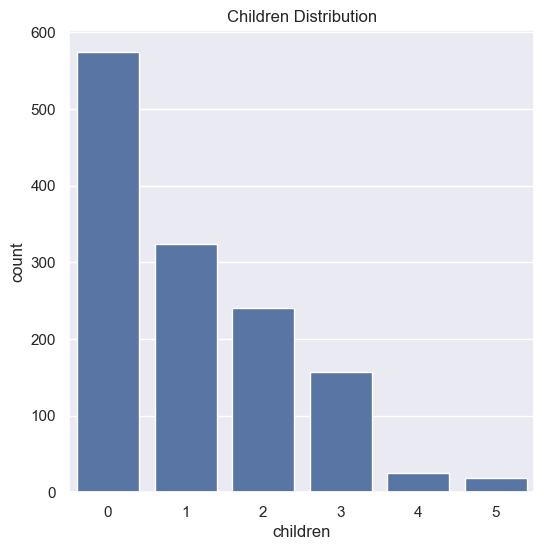

In [20]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [21]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

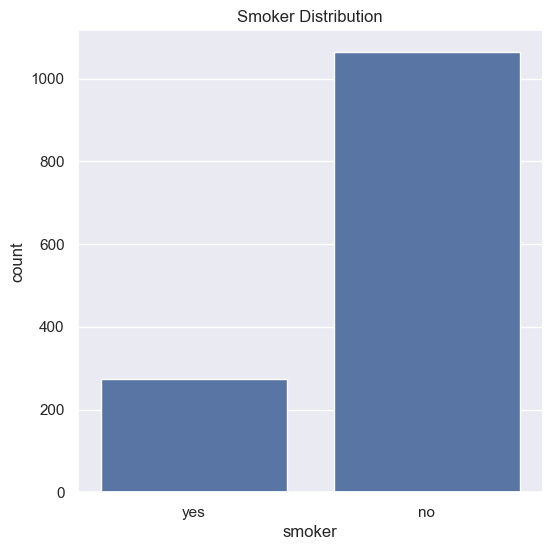

In [22]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [23]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

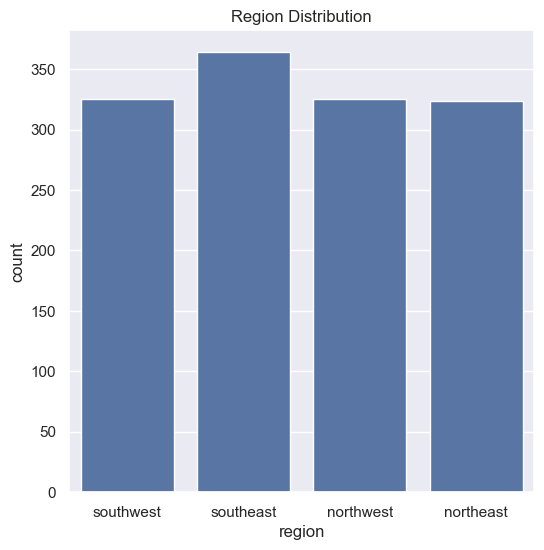

In [24]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [25]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

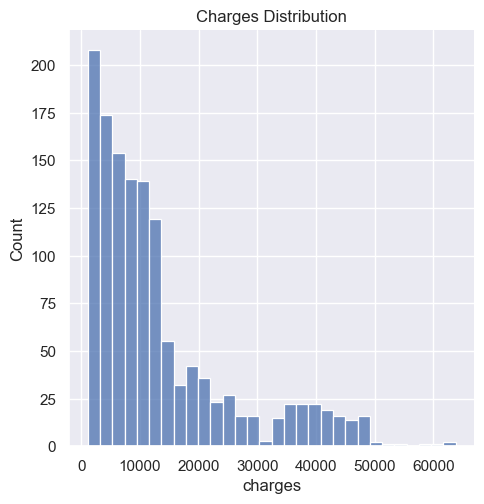

In [26]:
# Distribution of age value
plt.figure(figsize =(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Preprocessing
####  Encoding the categorical features

In [ ]:
# Encoding the 'sex' column 
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace = True)
# Encoding the 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace = True)
# Encoding the 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

### splitting the features and Target


In [ ]:
x = insurance_dataset.drop(columns = 'charges',axis=1)
y = insurance_dataset['charges']

In [ ]:
print(x)

In [ ]:
print(y)

### splitting the data into Training data and Testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

### Model Training

In [ ]:
# loading the Linear Regression model
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

### Model Evalution

In [ ]:
# prediction on training data
training_data_prediction = lr.predict(x_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('R squared value :',r2_train)

In [ ]:
test_data_prediction = lr.predict(x_test)

In [ ]:
# prediction of test data
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value :',r2_test)

- We will not getting overfitting issue in data set because the training data and testing data is almost same.

### Building a predictive system.

In [ ]:
input_data = (31,1,25.74,0,1,0)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lr.predict(input_data_reshaped)
print(prediction)
print('The Insurance cost is :', prediction[0])

- The predicted value is near to the given data value.